In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Dense
from keras.layers import GRU, SpatialDropout1D

## Data Collection


In [ ]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


## Label Encoding

In [ ]:
sex=LabelEncoder()
cpt=LabelEncoder()
recg=LabelEncoder()
ea=LabelEncoder()
st=LabelEncoder()

df['Sex']=sex.fit_transform(df['Sex'])
df['ChestPainType']=cpt.fit_transform(df['ChestPainType'])
df['RestingECG']=recg.fit_transform(df['RestingECG'])
df['ExerciseAngina']=ea.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=st.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Correlation Coefficient Heatmap

<Axes: >

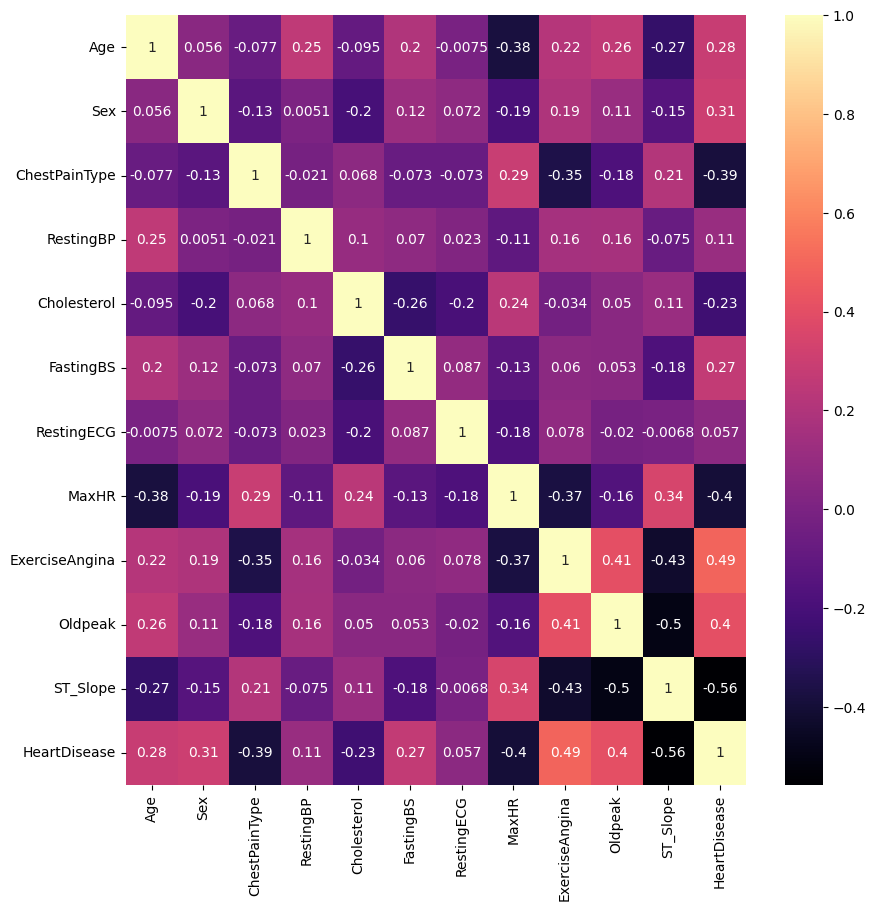

In [ ]:
corr_matrix=df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='magma')

## Feature Engineering

In [ ]:
thresh_hold=0.2
select_feat=corr_matrix.index[abs(corr_matrix['HeartDisease'])>=thresh_hold].to_list()
select_feat.remove('HeartDisease')
print(select_feat)

['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [ ]:
selected_features=df[select_feat]
selected_features.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289,0,172,0,0.0,2
1,49,0,2,180,0,156,0,1.0,1
2,37,1,1,283,0,98,0,0.0,2
3,48,0,0,214,0,108,1,1.5,1
4,54,1,2,195,0,122,0,0.0,2


In [ ]:
target=df['HeartDisease']
target

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


## Normalization

In [ ]:
scaler=StandardScaler()
selected_features=scaler.fit_transform(selected_features)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(selected_features,target,test_size=0.2)

# Machine Learnig Models

## Model 1 | Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

LOG_model=LogisticRegression()
LOG_model.fit(x_train,y_train)
log_pred=LOG_model.predict(x_test)

accuracy=accuracy_score(y_test,log_pred)

print("Accuracy=",accuracy*100,'%')

Accuracy= 90.21739130434783 %


## Model 2 | Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hinge_loss

SVM_model=SVC(probability=True)
SVM_model.fit(x_train,y_train)
svm_pred=SVM_model.predict(x_test)
accuracy=accuracy_score(y_test,svm_pred)
hinge_loss_value = hinge_loss(y_test, SVM_model.decision_function(x_test))

print("Hinge Loss:", hinge_loss_value)
print("Accuracy=",accuracy*100,'%')

Hinge Loss: 0.2721000810033621
Accuracy= 89.13043478260869 %


## Model 3 | Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Classifier Accuracy =", accuracy * 100, '%')

Random Forest Classifier Accuracy = 89.13043478260869 %


## Model 4 | Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Classifier Accuracy =", accuracy * 100, '%')


Decision Tree Classifier Accuracy = 79.34782608695652 %


## Model 5 | K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)

print("K-Nearest Neighbors Accuracy =", accuracy * 100, '%')


K-Nearest Neighbors Accuracy = 85.86956521739131 %


## Model 6 | Gaussian Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy =", accuracy * 100, '%')


Naive Bayes Accuracy = 87.5 %


## Model 7 | Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
sgd_pred = sgd_model.predict(x_test)
accuracy = accuracy_score(y_test, sgd_pred)

print("SGD Classifier Accuracy =", accuracy * 100, '%')


SGD Classifier Accuracy = 86.41304347826086 %


## Model 8 | AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
accuracy = accuracy_score(y_test, ada_pred)

print("AdaBoost Classifier Accuracy =", accuracy * 100, '%')


AdaBoost Classifier Accuracy = 86.95652173913044 %


## Model 9 | Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, gb_pred)

print("Gradient Boosting Accuracy =", accuracy * 100, '%')


Gradient Boosting Accuracy = 89.67391304347827 %


## Model 10 | Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

ridge_model = RidgeClassifier()
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
accuracy = accuracy_score(y_test, ridge_pred)

print("Ridge Classifier Accuracy =", accuracy * 100, '%')


Ridge Classifier Accuracy = 88.58695652173914 %


## Model 11 | Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

et_model = ExtraTreesClassifier()
et_model.fit(x_train, y_train)
et_pred = et_model.predict(x_test)
accuracy = accuracy_score(y_test, et_pred)

print("Extra Trees Classifier Accuracy =", accuracy * 100, '%')


Extra Trees Classifier Accuracy = 90.21739130434783 %


## Model 12 | Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bagging_model = BaggingClassifier()
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_test)
accuracy = accuracy_score(y_test, bagging_pred)

print("Bagging Classifier Accuracy =", accuracy * 100, '%')


Bagging Classifier Accuracy = 83.69565217391305 %


## Model 13 | Logistic Regression CV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

log_reg_cv_model = LogisticRegressionCV()
log_reg_cv_model.fit(x_train, y_train)
log_reg_cv_pred = log_reg_cv_model.predict(x_test)
accuracy = accuracy_score(y_test, log_reg_cv_pred)

print("Logistic Regression CV Accuracy =", accuracy * 100, '%')


Logistic Regression CV Accuracy = 85.86956521739131 %


## Model 14 | Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

voting_model = VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', SVC())], voting='hard')
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)
accuracy = accuracy_score(y_test, voting_pred)

print("Voting Classifier Accuracy =", accuracy * 100, '%')


Voting Classifier Accuracy = 85.86956521739131 %


In [ ]:
def predict_cardiovascular_risk():
    """
    Predicts cardiovascular risk based on predefined static data.
    """
    # Static data from the first row of the dataset
    user_data = {
        'Age': 40,
        'Sex': 1,
        'ChestPainType': 3,
        'Cholesterol': 289,
        'FastingBS': 0,
        'MaxHR': 172,
        'ExerciseAngina': 0,
        'Oldpeak': 0.0,
        'ST_Slope': 1
    }

    # Feature transformation
    features = np.array([
        user_data['Age'],
        user_data['Sex'],
        user_data['ChestPainType'],
        user_data['Cholesterol'],
        user_data['FastingBS'],
        user_data['MaxHR'],
        user_data['ExerciseAngina'],
        user_data['Oldpeak'],
        user_data['ST_Slope']
    ]).reshape(1, -1)

    # Apply standard scaling
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Prediction
    prediction = SVM_model.predict(features_scaled)

    # Return risk level
    risk_level = "High Risk" if prediction[0] == 1 else "Low Risk"
    return risk_level

# Call the function
risk = predict_cardiovascular_risk()
print("Predicted Risk Level:", risk)

Predicted Risk Level: Low Risk


In [ ]:
import pickle

# Save the trained model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(SVM_model, f)

print("All components saved successfully!")

All components saved successfully!


# Neural Network

## Model 1 | ANN

In [ ]:
model0=keras.Sequential([
    keras.layers.Dense(128,activation="relu"),
    Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")])

es = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)

model0.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model0.fit(x_train,
          y_train,
          epochs=100,
          callbacks = [es],
          verbose = 1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.6367 - loss: 0.6184
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8478 - loss: 0.3703 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.3406
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.3125
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3206
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.2954
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8772 - loss: 0.3084
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8826 - loss: 0.3067
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9028 - loss: 0.2527
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8843 - loss: 0.2929
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9043 - loss: 0.2505
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

In [ ]:
model0.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.7865 - loss: 0.6268


[0.5914744138717651, 0.804347813129425]

## Model 2 | GRU

In [ ]:
x_train = np.expand_dims(x_train, axis=1)

In [ ]:
model = keras.Sequential([
    GRU(128, activation="relu", return_sequences=True),
    SpatialDropout1D(0.2),
    GRU(64, activation="relu", return_sequences=True),
    SpatialDropout1D(0.2),
    GRU(32, activation="relu"),
    Dense(2, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=100,
          callbacks=[es],
          verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.5230 - loss: 0.6889
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8349 - loss: 0.6036
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.3778
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8685 - loss: 0.3322
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.2853 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.2991 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.3115 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8853 - loss: 0.2971 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.2987 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8879 - loss: 0.2805 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8890 - loss: 0.2675 
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [ ]:
x_test = np.expand_dims(x_test, axis=1)
model.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.7974 - loss: 0.8726


[0.8187594413757324, 0.8097826242446899]

## Model 3 | Bi-LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf

model3 = keras.Sequential([
    Bidirectional(LSTM(128, activation="relu", return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(64, activation="relu", return_sequences=True)),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(32, activation="relu")),
    Dense(2, activation="sigmoid")
])

es = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)

model3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model3.fit(x_train,
          y_train,
          epochs=100,
          validation_data = (x_test, y_test),
          callbacks=[es],
          verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 327ms/step - accuracy: 0.6123 - loss: 0.6903 - val_accuracy: 0.8152 - val_loss: 0.6703
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8497 - loss: 0.6259 - val_accuracy: 0.8098 - val_loss: 0.4876
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3734 - val_accuracy: 0.8043 - val_loss: 0.5606
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8777 - loss: 0.3282 - val_accuracy: 0.8098 - val_loss: 0.4915
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8756 - loss: 0.2999 - val_accuracy: 0.8152 - val_loss: 0.4886
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8784 - loss: 0.3213 - val_accuracy: 0.8043 - val_loss: 0.4616
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8779 - loss: 0.2843 - val_accuracy: 0.7989 - val_loss: 0.5052
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8848 - loss: 0.2734 - val_accuracy: 0.8043

In [ ]:
model3.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 1.0075 


[0.9270979762077332, 0.820652186870575]

## Model 4 | Custom BiLstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam

model4 = Sequential([
    Bidirectional(GRU(128, return_sequences=True, activation="relu"), input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.3),
    Bidirectional(GRU(64, return_sequences=False, activation="relu")),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(2, activation="sigmoid")
])

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

model4.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model4.fit(x_train,
          y_train,
          epochs=100,
          callbacks=[es],
          validation_split=0.2,
          verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - accuracy: 0.7107 - loss: 0.6497 - val_accuracy: 0.8980 - val_loss: 0.4286
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8212 - loss: 0.4535 - val_accuracy: 0.9184 - val_loss: 0.2460
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8591 - loss: 0.3505 - val_accuracy: 0.8912 - val_loss: 0.2590
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8627 - loss: 0.3628 - val_accuracy: 0.9116 - val_loss: 0.2451
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8796 - loss: 0.3390 - val_accuracy: 0.8980 - val_loss: 0.2447
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8955 - loss: 0.2834 - val_accuracy: 0.9048 - val_loss: 0.2381
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8836 - loss: 0.2967 - val_accuracy: 0.9048 - val_loss: 0.2399
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8927 - loss: 0.2883 - val_accuracy: 0.9116 

In [ ]:
model4.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.8086 - loss: 0.4872


[0.4692910313606262, 0.820652186870575]

In [ ]:
from sklearn.metrics import classification_report
y_pred = model4.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step
              precision    recall  f1-score   support

           0       0.77      0.78      0.78        78
           1       0.84      0.83      0.83       106

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [ ]:
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)